In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df1=pd.read_csv('zomato.csv')

In [3]:
df2=pd.read_excel('Country-Code.xlsx')

In [53]:
zomato = pd.merge(df1,df2, on = 'Country Code')
zomato

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [55]:
zomato.Cuisines.replace(np.nan,'Unknown',inplace=True)

In [56]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
zomato.shape

(9551, 22)

In [8]:
zomato[zomato['Cuisines']=='Nan']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


-- Now Lets start our analysis and see which top 15 restaurants in the data set have maximum number of outlets

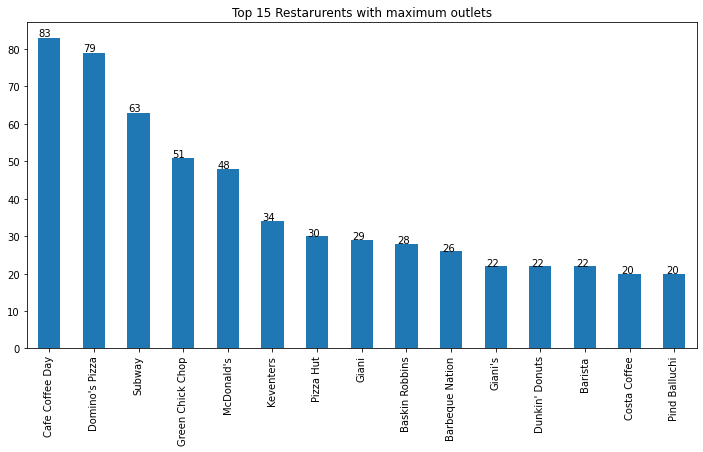

In [9]:
#Top 15 Restro with maximum number of outlets
ax=zomato['Restaurant Name'].value_counts().head(15).plot.bar(figsize =(12,6))
ax.set_title("Top 15 Restarurents with maximum outlets")
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() * 1.005, i.get_height() * 1.005))

In [10]:
#### We can see CCD, Dominos and Subway are the clear winners here. But what about the other restaurants apart from top 15!!
#### A better way to visualize the no. of outlets for more restaurants can be with wordcloud.

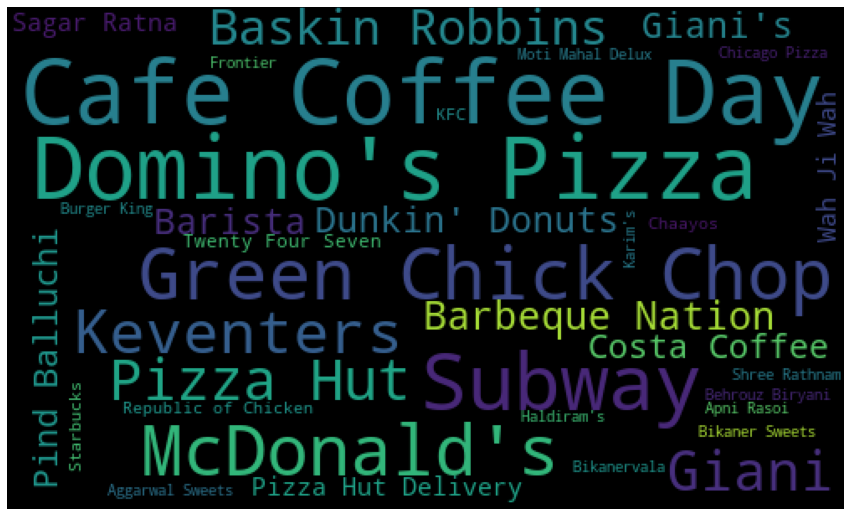

In [11]:
stopwords = set(STOPWORDS)

wordcloud = (WordCloud(width=500, height=300, relative_scaling=0.5, stopwords=stopwords).generate_from_frequencies(zomato['Restaurant Name'].value_counts().head(35)))
fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
#No. of unique countries & number of restro listed in data set
zomato.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [13]:
#### We can clearly see that this data has maximum number of listings from India.
#,So it makes sense to have some analysis for the data of Indian restaurants.
#### Lets see top 10 cities in India represented in the data set.

In [14]:
#Number of restro on zomato in different cities in India
zomato.loc[zomato['Country']=='India'].City.value_counts().head(10)

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Name: City, dtype: int64

In [15]:
#### Clearly this data has maximum number of restaurants listed in Delhi NCR region
#(Comprising of New Delhi, Gurgaon, Noida, Faridabad).
#Other cities have almost equal distribution but significantly less as compared to Delhi NCR region.

Lets find out top 10 restaurants in the data with highest number of votes

<AxesSubplot:xlabel='Restaurant Name'>

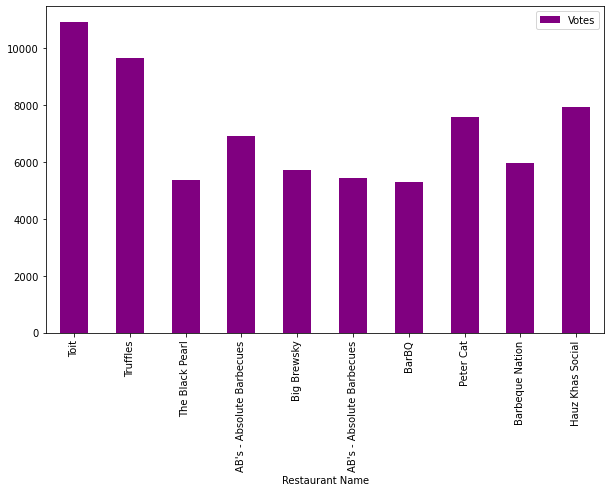

In [16]:
#Top 10 Restro with highest no. of votes
max_votes =zomato.Votes.sort_values(ascending=False).head(10)
zomato.loc[zomato['Votes'].isin(max_votes)][['Restaurant Name','Votes']]
zomato.loc[zomato['Votes'].isin(max_votes)][['Restaurant Name','Votes']].plot.bar(x='Restaurant Name', y='Votes',
                                                                                  figsize = (10,6), color='purple')

In [17]:
#### We can see in the above graph that the restaurants with maximum number of outlets are not the one whic have highest number of votes.
#The above list is totally different that our list of top 10 restaurants with maximum number of outlets.

Lets separate the data for restaurants from India for ease of analysis. If we consider the whole data set, we will have to take into account the currency values for each country. For example while considering 'Average cost for two' on graph the data should be uniform

In [18]:
zomato_india = zomato.loc[zomato['Country']=='India']
zomato_india.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India


Lets try to find out If there is any relation between average cost for two and aggregate rating of restaurants.

<AxesSubplot:title={'center':'Cost vs Agg Rating'}, xlabel='Average Cost for two', ylabel='Aggregate rating'>

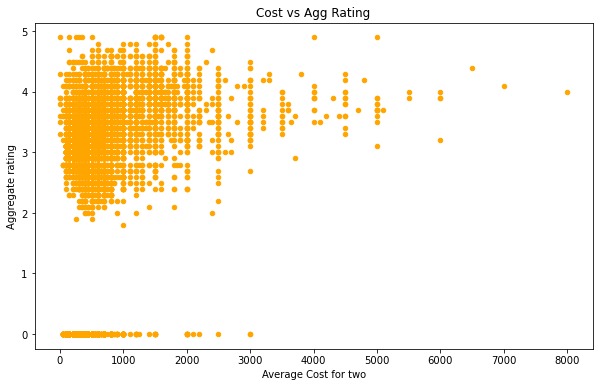

In [19]:
#Is there any relation between average cost for two and aggregate rating of restaurants
zomato_india.plot.scatter(x='Average Cost for two',y='Aggregate rating',figsize=(10,6), color='orange', title="Cost vs Agg Rating")

In [20]:
#### From the above graph, we can see that most of the data is clustered around cost upto 2000 and rating values from 2 to 4.5 approximately.
#There are few restaurants with cost range between 2500 to 6000.
#### There are some outliers in the data where cost is listed as 0 because it might not be captured for those restaurants.
#### A more concise and detailed view of above data can be via hex plot as shown below.

Lets see what are the top 10 cuisines- served by maximum number of restaurants

(-1.1057505479897058,
 1.1002738356185575,
 -1.1007208411416545,
 1.1102093821713037)

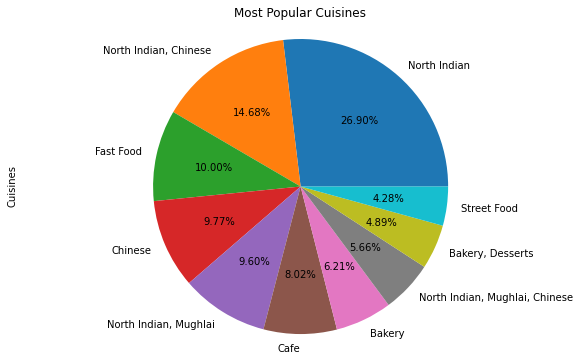

In [21]:
#Top 10 Cuisines served by restaurants
zomato_india['Cuisines'].value_counts().sort_values(ascending=False).head(10)
zomato_india['Cuisines'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular Cuisines", autopct='%1.2f%%')
plt.axis('equal')

In [22]:
#### From the above graph, we can clearly see that 'North Indian' cuisine is the most popular cuisine and
#it makes sense as well since the maximum data has restaurants listed from North India.

Next lets try to find out does there exist any correlation among 'avg cost for two', 'price range' and 'agg rating'¶

<AxesSubplot:>

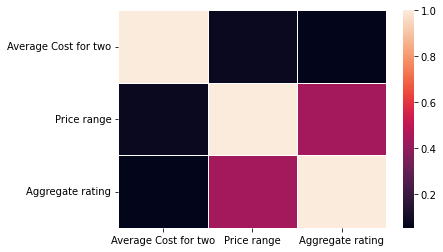

In [23]:
#Correlation among avg cost, price range, agg rating
zomato_corr = zomato[['Average Cost for two', 'Price range', 'Aggregate rating']]
sns.heatmap(zomato_corr.corr(),linewidth=1.0)
#cmap='PuOr' cmap='YlGnBu'

In [24]:
#### We can see 'price range'-'agg rating' appear to be correlated upto an extent but still, witht this
#,data,the above graph is not good enough to provide a confident answer.

Lets try to find out more insights for correlation among 'avg cost for two', 'price range' and 'agg rating' by using pair plot but keeping our data limited to top 5 cities with max restaurants.

C:\Users\91974\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


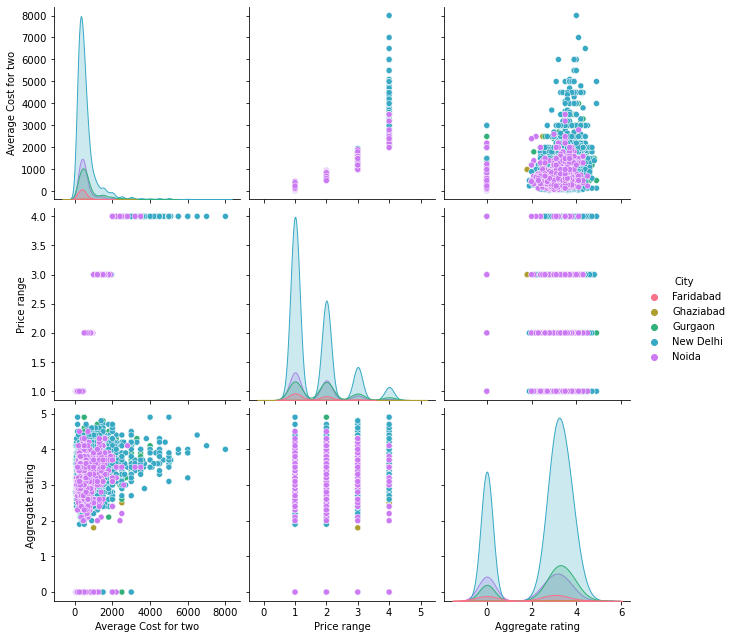

In [25]:
#More insight for correlation by using pair plot keeping top 10 cities with max restro
top5_indian_cities = ['New Delhi', 'Gurgaon', 'Noida','Faridabad', 'Ghaziabad']
zomato_p = zomato.loc[zomato['City'].isin(top5_indian_cities)]
zomato_pair = zomato_p[['Average Cost for two', 'Price range', 'Aggregate rating', 'City']]
sns.pairplot(zomato_pair, size=3, hue='City', palette="husl")

In [26]:
#### From the graphs above we can see that 'Agg Rating' is getting higher when 'Avg. cost for two' is increasing.
#### North Indian cuisine is scoring the highest 'Avg cost for two' among all top 5 cuisines.

Now lets analyze top 10 cuisines with 'price range' and 'agg rating' and look at our findings.

Text(0.5, 1.0, 'Analysis of Top10 Cuisines with price range and Agg. rating ')

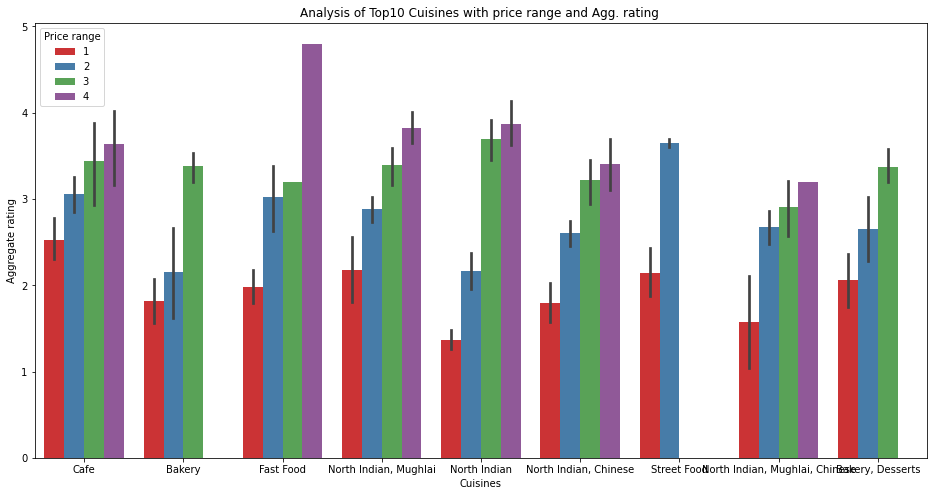

In [27]:
#ANalysis of top 10 cuisines with price range and agg rating
top10cuisines_list=['North Indian', 'North Indian, Chinese', 'Fast Food', 'North Indian, Mughlai', 'Cafe', 'Bakery',
                   'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food' ]
zomato_cuisines = zomato.loc[zomato['Cuisines'].isin(top10cuisines_list)]
zomato_cuisines_data = zomato_cuisines[['Average Cost for two', 'Price range', 'Aggregate rating', 'Cuisines']]

fig, axx =plt.subplots(figsize=(16,8))
sns.barplot(x='Cuisines', y='Aggregate rating', hue='Price range', data=zomato_cuisines_data, palette="Set1")
axx.set_title("Analysis of Top10 Cuisines with price range and Agg. rating ")

In [28]:
#### From the above graph, we can clearly see that among the top 10 cuisines, price range 4 has always got the highest rating!!
#### May be we can assume that the high end restaurants (with higher price range) serves the best and hence the higher 'Agg rating' in all cuisines.
#### Similar is the case with price range 1 which has lowest 'Agg rating' amoung all cuisines
#### In all the cuisines, we can see the trend, higher the price range, better is the 'Agg rating' #### Now lets see what is the most common 'Agg Rating' for each type of cuisine among top 10 cuisines.

<AxesSubplot:xlabel='Cuisines', ylabel='Aggregate rating'>

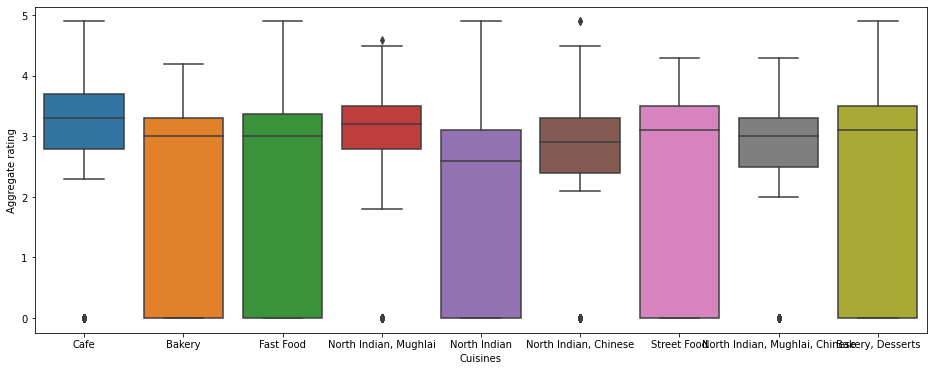

In [29]:
#Most common agg. rating for each type of cuisine
top10cuisines_list=['North Indian', 'North Indian, Chinese', 'Fast Food', 'North Indian, Mughlai', 'Cafe', 'Bakery',
                   'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food' ]
zomato_cuisines = zomato.loc[zomato['Cuisines'].isin(top10cuisines_list)]
zomato_cuisines_data = zomato_cuisines[['Average Cost for two', 'Price range', 'Aggregate rating', 'Cuisines']]
fig, axx =plt.subplots(figsize=(16,6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=zomato_cuisines_data)

In [30]:
#### From the above box plot graph, we can see that number one cuisine in our top 10 list which is 'North Indian', mid 50% of its 'Agg ratings' are upto 3 with median rating of around 2.8 which is in fact the lowest median rating among all the cuisine types.
#### 'Cafe' catrgory of cuisines manages to maintain highest median rating of around 3.4
#### The popularity of cuisine does not necessary means it is highly rated. In our case 'North Indian' cuisine is the most popular in our data but maintains least median rating. It is widely served may be because most of the restaurants are in North India
#### Bakery, Fast Food, Street Food, Desserts are almost equivalent in terms of rating comparison.

In [31]:
#Restaurant Percentage wise rating in top 5 cities
top5_indian_cities = ['New Delhi', 'Gurgaon', 'Noida','Faridabad', 'Ghaziabad']
zomato_rate = zomato.loc[zomato['City'].isin(top5_indian_cities)]

#Find total number of restaurants
total_restro = zomato_rate.groupby(['City'], as_index=False).count()[['City','Restaurant ID']]
total_restro.columns=['City','Total Restaurants']

#Find total rating count of each type
top5rest = zomato_rate.groupby(['City','Rating text'], as_index=False)[['Restaurant Name']].count()
top5rest.columns=['City','Rating text', 'Total Ratings']

#Merge both the dataframes and calculate percentage
top5restro_rating_percent = pd.merge(total_restro, top5rest, on='City')
top5restro_rating_percent['Percentage']= (top5restro_rating_percent['Total Ratings']/
                                       top5restro_rating_percent['Total Restaurants'])*100

top5restro_rating_percent

,City,Total Restaurants,Rating text,Total Ratings,Percentage
0,Faridabad,251,Average,123,49.003984
1,Faridabad,251,Excellent,1,0.398406
2,Faridabad,251,Good,22,8.764940
3,Faridabad,251,Not rated,100,39.840637
4,Faridabad,251,Poor,2,0.796813
5,Faridabad,251,Very Good,3,1.195219
6,Ghaziabad,25,Average,18,72.000000
7,Ghaziabad,25,Good,4,16.000000
8,Ghaziabad,25,Not rated,2,8.000000
9,Ghaziabad,25,Poor,1,4.000000


<AxesSubplot:title={'center':'Percentage Rating of Restaurants in Top 5 Cities'}, xlabel='City', ylabel='Percentage'>

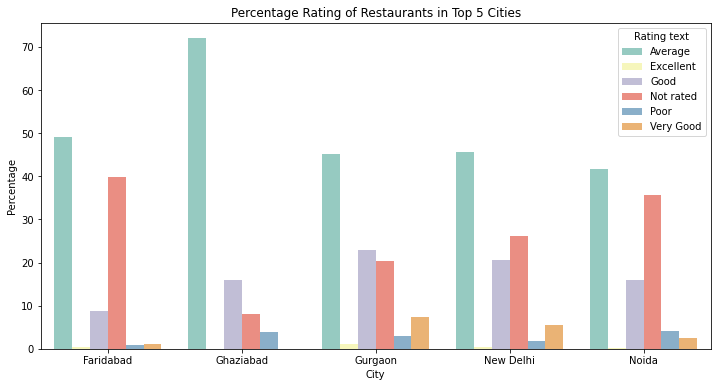

In [32]:
#Plot Rating percentage of restaurants in top 5 cities
fig, axx =plt.subplots(figsize=(12,6))
axx.set_title("Percentage Rating of Restaurants in Top 5 Cities")
sns.barplot(x='City', y='Percentage',hue='Rating text', data=top5restro_rating_percent, palette='Set3')

In [33]:
#### From the above graph, we can see that maximum number of restaurants in top 5 cities have the rating 'Average'
#### Excellent rating is almost negligible.
#### There are significant number of restaurants which are not rated as well. So the data my needs to take that into account while making any accurate predictions.